# 1. Pengumpulan Data
Dataset didapatkan dari : https://archive.ics.uci.edu/dataset/45/heart+disease

Dataset didownload dalam bentuk file 'zip'. Dalam zip tersebut terdapat file 'cleaveland.data' yang akan digunakan sebagai dataset utama. Deskripsi dari data terdapat pada file 'heart-disease.names'

# 2. Menelaah Data

Dataset berisi 76 fitur dimana 75 fitur memiliki tipe data numerik dan 1 fitur memiliki tipe data string.

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle
import itertools

## Load Data

In [ ]:
file_path = r'/content/cleveland.data'

with open(file_path, 'r', encoding='Latin1') as file:
    raw_data = [line.strip() for line in file]

data = itertools.takewhile(
    lambda x: len(x) == 76,
    (' '.join(raw_data[i:(i+10)]).split() for i in range(0, len(raw_data), 10))
)

data = pd.DataFrame(data)
data = data.drop(75, axis=1)
data = data.astype(float)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,1.0,0.0,63.0,1.0,-9.0,-9.0,-9.0,-9.0,1.0,145.0,...,-9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
1,2.0,0.0,67.0,1.0,-9.0,-9.0,-9.0,-9.0,4.0,160.0,...,-9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
2,3.0,0.0,67.0,1.0,-9.0,-9.0,-9.0,-9.0,4.0,120.0,...,-9.0,2.0,2.0,1.0,1.0,1.0,7.0,3.0,-9.0,-9.0
3,4.0,0.0,37.0,1.0,-9.0,-9.0,-9.0,-9.0,3.0,130.0,...,-9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
4,6.0,0.0,41.0,0.0,-9.0,-9.0,-9.0,-9.0,2.0,130.0,...,-9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0


# 3. Validasi Data

Dataset dinilai valid dan dapat digunakan untuk analisis. Karena telah digunakan dalam beberapa penelitian sebelumnya dan memiliki lisensi. Selain itu dokumentasi dari data juga lengkap untuk analisa lebih lanjut.

Didalam dokumentasi data terdapat beberapa kolom yang memiliki missing value, ditandai dengan nilai -9.0. Sebelum lanjut ke tahap selanjutnya nilai tersebut diubah terlebih dahulu menjadi nan untuk memudahkan pada tahap selanjutnya.

In [ ]:
data = data.where(data >= 0, np.nan)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,1.0,0.0,63.0,1.0,NaN,NaN,NaN,NaN,1.0,145.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,2.0,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,160.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,3.0,0.0,67.0,1.0,NaN,NaN,NaN,NaN,4.0,120.0,...,NaN,2.0,2.0,1.0,1.0,1.0,7.0,3.0,NaN,NaN
3,4.0,0.0,37.0,1.0,NaN,NaN,NaN,NaN,3.0,130.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,6.0,0.0,41.0,0.0,NaN,NaN,NaN,NaN,2.0,130.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN


# 4. Menentukan Fitur Data

Sesuai dengan dokumentasi terdapat 14 fitur utama yang digunakan dalam analisa pada dataset ini yaitu : 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', dan 'num'.

In [ ]:
column_feature = [2, 3, 8, 9, 11, 15, 18, 31, 37, 39, 40, 43, 50, 57]
data_filtered = data.iloc[:, column_feature]

column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target',
}

data_filtered = data_filtered.rename(columns=column_mapping)
data_filtered.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


# 5. Membersihkan Data

Setelah melalui tahap pemilihan fitur selanjutnya adalah tahap mengisi null value / nan dalam data. Pada analisa ini nan tersebut diisi dengan rata rata setiap kolom. Lalu selanjutnya data kembali dibersihkan dengan mengahapus data yang sama / duplikat.

In [ ]:
data_filtered.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          2
thal        2
target      0
dtype: int64

In [ ]:
meanCa = round(data_filtered.ca.dropna().mean())
meanThal = round(data_filtered.thal.dropna().mean())

In [ ]:
mean_values = {
    'ca': meanCa,
    'thal': meanThal,
}

data_cleaned = data_filtered.fillna(value=mean_values)
data_cleaned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [ ]:
data_cleaned.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data_cleaned = data_cleaned.drop_duplicates()
data_cleaned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


# 6. Konstruksi Data

Data akan dikonstruksi berdasarkan fitur korelasi yang ada. Berdasarkan fitur korelasi tidak diperlukan adanya penambahan fitur / penggabungan fitur untuk meningkat efektifitas dari data.

<Axes: >

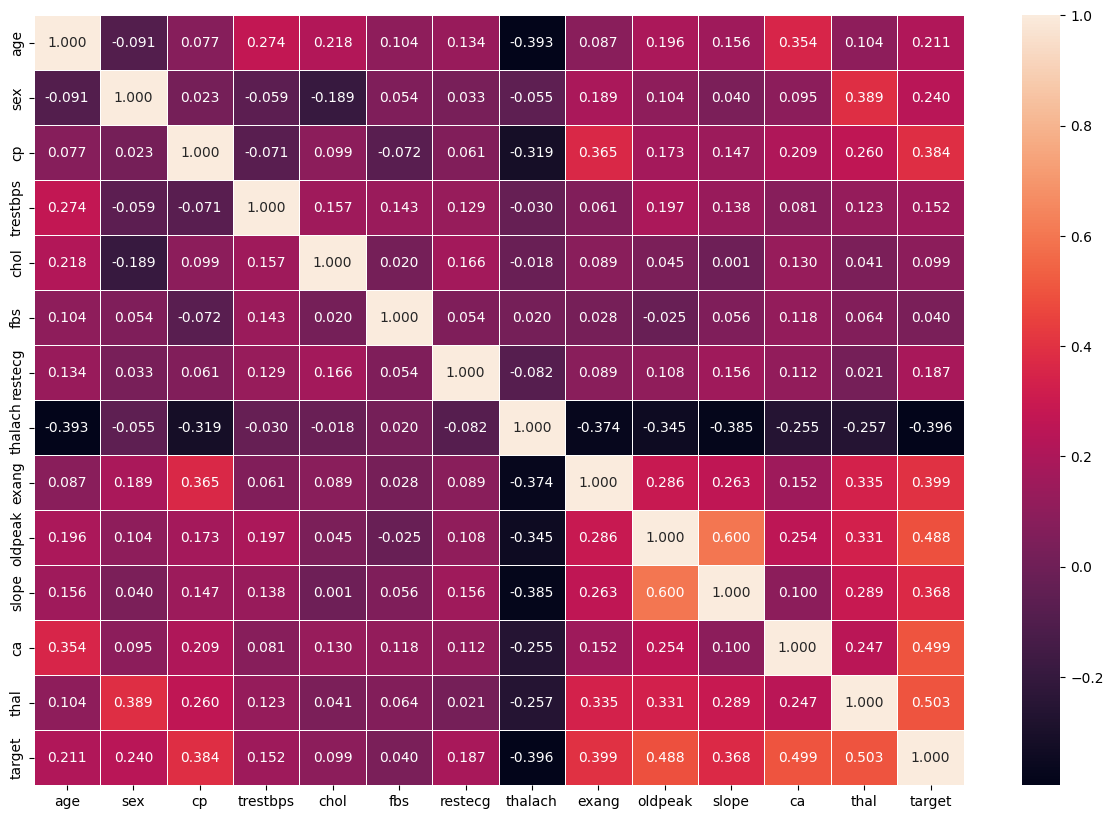

In [ ]:
cor_mat=data_cleaned.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

# 7. Menentukan Label Data

Sesuai dengan dokumentasi yang ada, label dari dataset ini berada di kolom ke 58. Terdapat 5 label yaitu 0, 1, 2, 3, dan 4.

Persebaran label dari data tidak merata maka dari itu akan dilakukan oversampling. Pada analisis ini akan dibandingkan dua metode oversampling yaitu random oversampling dan smote.

Lalu setelah itu setiap jenis data akan dinormalisasi untuk menyamakan skala data di setiap kolom.

In [ ]:
X = data_cleaned.drop("target",axis=1).values
y = data_cleaned.iloc[:,-1]

0.0    157
1.0     50
3.0     32
2.0     31
4.0     12
Name: target, dtype: int64


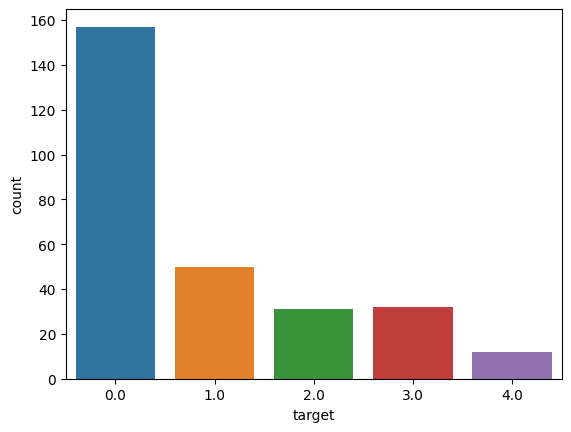

In [ ]:
print(data_cleaned['target'].value_counts())

sns.countplot(x="target", data=data_cleaned)
plt.show()

In [ ]:
# Random Oversampling
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

# SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

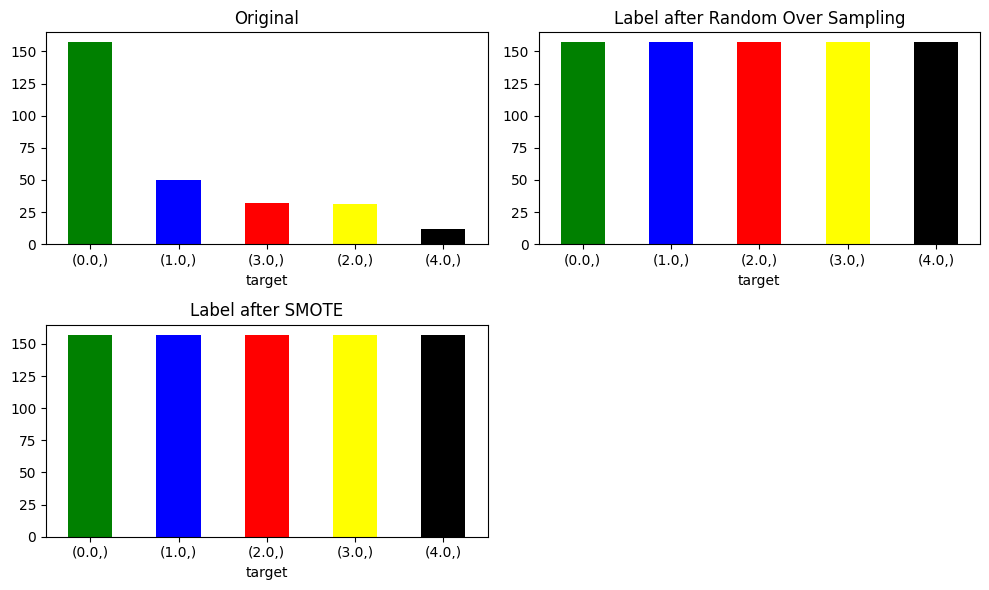

In [ ]:
plt.figure(figsize=(12, 12))

# Subplot 1
plt.subplot(2, 2, 1)
label = pd.DataFrame(data=y)
label.value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue', 'red', 'yellow', 'black'])
plt.title("Original")
plt.xticks(rotation=0)

# Subplot 2
plt.subplot(2, 2, 2)
label_smote = pd.DataFrame(data=y_ros)
label_smote.value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue', 'red', 'yellow', 'black'])
plt.title("Label after Random Over Sampling")
plt.xticks(rotation=0)
plt.tight_layout()

# Subplot 3
plt.subplot(2, 2, 3)
label_tomekLinks = pd.DataFrame(data=y_smote)
label_tomekLinks.value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue', 'red', 'yellow', 'black'])
plt.title("Label after SMOTE")
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [ ]:
temp = pd.DataFrame(X_ros)
temp.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000
mean,56.129936,0.787261,3.433121,133.449682,252.391083,0.154140,1.193631,142.436943,0.481529,1.508025,1.766879,1.043312,5.489172
std,8.604456,0.409505,0.913852,18.469717,52.092037,0.361313,0.979749,23.325096,0.499977,1.271960,0.567328,1.054949,1.887850
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,51.000000,1.000000,3.000000,120.000000,217.000000,0.000000,0.000000,125.000000,0.000000,0.400000,1.000000,0.000000,3.000000
50%,57.000000,1.000000,4.000000,130.000000,246.000000,0.000000,2.000000,144.000000,0.000000,1.200000,2.000000,1.000000,7.000000
75%,62.000000,1.000000,4.000000,145.000000,286.000000,0.000000,2.000000,160.000000,1.000000,2.500000,2.000000,2.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_ros = scaler.fit_transform(X_ros)
X_smote = scaler.fit_transform(X_smote)

In [ ]:
temp = pd.DataFrame(X_ros)
temp.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000
mean,0.565207,0.787261,0.811040,0.372167,0.288564,0.154140,0.596815,0.545320,0.481529,0.243230,0.383439,0.347771,0.622293
std,0.179260,0.409505,0.304617,0.174243,0.118932,0.361313,0.489875,0.178054,0.499977,0.205155,0.283664,0.351650,0.471962
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.458333,1.000000,0.666667,0.245283,0.207763,0.000000,0.000000,0.412214,0.000000,0.064516,0.000000,0.000000,0.000000
50%,0.583333,1.000000,1.000000,0.339623,0.273973,0.000000,1.000000,0.557252,0.000000,0.193548,0.500000,0.333333,1.000000
75%,0.687500,1.000000,1.000000,0.481132,0.365297,0.000000,1.000000,0.679389,1.000000,0.403226,0.500000,0.666667,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 7. Membangun Model

Terdapat 4 algoritma yang digunakan untuk membangun model yaitu knn, svm, decision tree, dan random forest. Sebelum model dibangun data akan dibagi menjadi dua subset yaitu data training sebesar 80% dan data testing sebesar 20%.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42,stratify=y_ros)

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42,stratify=y_smote)

## KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

knn_model_ros = KNeighborsClassifier(n_neighbors = 3)
knn_model_ros.fit(X_train_ros, y_train_ros)

knn_model_smote = KNeighborsClassifier(n_neighbors = 3)
knn_model_smote.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy KNN Original Dataset:", accuracy_knn)

y_pred_knn_ros = knn_model_ros.predict(X_test_ros)
accuracy_knn_ros = round(accuracy_score(y_test_ros,y_pred_knn_ros),3)
print("Accuracy KNN Random Over Sampling Dataset:", accuracy_knn_ros)

y_pred_knn_smote = knn_model_smote.predict(X_test_smote)
accuracy_knn_smote = round(accuracy_score(y_test_smote,y_pred_knn_smote),3)
print("Accuracy KNN SMOTE Dataset:", accuracy_knn_smote)

Accuracy KNN Original Dataset: 0.596
Accuracy KNN Random Over Sampling Dataset: 0.866
Accuracy KNN SMOTE Dataset: 0.828


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("Classification Report ROS:")
print(classification_report(y_test_ros, y_pred_knn_ros))

print("Classification Report SMOTE:")
print(classification_report(y_test_smote, y_pred_knn_smote))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.88      0.79        32
         1.0       0.29      0.20      0.24        10
         2.0       1.00      0.33      0.50         6
         3.0       0.25      0.29      0.27         7
         4.0       0.00      0.00      0.00         2

    accuracy                           0.60        57
   macro avg       0.45      0.34      0.36        57
weighted avg       0.59      0.60      0.57        57

Classification Report ROS:
              precision    recall  f1-score   support

         0.0       0.79      0.69      0.73        32
         1.0       0.76      0.81      0.78        31
         2.0       0.97      0.97      0.97        31
         3.0       0.88      0.88      0.88        32
         4.0       0.94      1.00      0.97        31

    accuracy                           0.87       157
   macro avg       0.87      0.87      0.87       157
weighted avg       0.86    

## SVM

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

svm_model_ros = SVC()
svm_model_ros.fit(X_train_ros, y_train_ros)

svm_model_smote = SVC()
svm_model_smote.fit(X_train_smote, y_train_smote)

SVC()

In [ ]:
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = round(accuracy_score(y_test,y_pred_svm),3)
print("Accuracy SVM Original Dataset:", accuracy_svm)

y_pred_svm_ros = svm_model_ros.predict(X_test_ros)
accuracy_svm_ros = round(accuracy_score(y_test_ros,y_pred_svm_ros),3)
print("Accuracy SVM Random Over Sampling Dataset:", accuracy_svm_ros)

y_pred_svm_smote = svm_model_smote.predict(X_test_smote)
accuracy_svm_smote = round(accuracy_score(y_test_smote,y_pred_svm_smote),3)
print("Accuracy SVM SMOTE Dataset:", accuracy_svm_smote)

Accuracy SVM Original Dataset: 0.614
Accuracy SVM Random Over Sampling Dataset: 0.758
Accuracy SVM SMOTE Dataset: 0.758


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("Classification Report ROS:")
print(classification_report(y_test_ros, y_pred_svm_ros))

print("Classification Report SMOTE:")
print(classification_report(y_test_smote, y_pred_svm_smote))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      0.94      0.81        32
         1.0       0.33      0.40      0.36        10
         2.0       0.00      0.00      0.00         6
         3.0       0.33      0.14      0.20         7
         4.0       0.00      0.00      0.00         2

    accuracy                           0.61        57
   macro avg       0.28      0.30      0.27        57
weighted avg       0.50      0.61      0.54        57

Classification Report ROS:
              precision    recall  f1-score   support

         0.0       0.78      0.78      0.78        32
         1.0       0.69      0.65      0.67        31
         2.0       0.88      0.71      0.79        31
         3.0       0.81      0.66      0.72        32
         4.0       0.69      1.00      0.82        31

    accuracy                           0.76       157
   macro avg       0.77      0.76      0.75       157
weighted avg       0.77    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

dt_model_ros = DecisionTreeClassifier()
dt_model_ros.fit(X_train_ros, y_train_ros)

dt_model_smote = DecisionTreeClassifier()
dt_model_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier()

In [ ]:
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = round(accuracy_score(y_test,y_pred_dt),3)
print("Accuracy Decision Tree Original Dataset:", accuracy_dt)

y_pred_dt_ros = dt_model_ros.predict(X_test_ros)
accuracy_dt_ros = round(accuracy_score(y_test_ros,y_pred_dt_ros),3)
print("Accuracy Decision Tree Random Over Sampling Dataset:", accuracy_dt_ros)

y_pred_dt_smote = dt_model_smote.predict(X_test_smote)
accuracy_dt_smote = round(accuracy_score(y_test_smote,y_pred_dt_smote),3)
print("Accuracy Decision Tree Random Under Sampling Dataset:", accuracy_dt_smote)

Accuracy Decision Tree Original Dataset: 0.509
Accuracy Decision Tree Random Over Sampling Dataset: 0.911
Accuracy Decision Tree Random Under Sampling Dataset: 0.707


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("Classification Report ROS:")
print(classification_report(y_test_ros, y_pred_dt_ros))

print("Classification Report SMOTE:")
print(classification_report(y_test_smote, y_pred_dt_smote))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73        32
         1.0       0.20      0.20      0.20        10
         2.0       0.25      0.33      0.29         6
         3.0       0.50      0.29      0.36         7
         4.0       0.00      0.00      0.00         2

    accuracy                           0.51        57
   macro avg       0.34      0.31      0.32        57
weighted avg       0.54      0.51      0.52        57

Classification Report ROS:
              precision    recall  f1-score   support

         0.0       0.95      0.59      0.73        32
         1.0       0.79      0.97      0.87        31
         2.0       0.91      1.00      0.95        31
         3.0       0.94      1.00      0.97        32
         4.0       1.00      1.00      1.00        31

    accuracy                           0.91       157
   macro avg       0.92      0.91      0.90       157
weighted avg       0.92    

## Random Forest

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_model_ros = RandomForestClassifier()
rf_model_ros.fit(X_train_ros, y_train_ros)

rf_model_smote = RandomForestClassifier()
rf_model_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier()

In [ ]:
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = round(accuracy_score(y_test,y_pred_rf),3)
print("Accuracy Decision Tree Original Dataset:", accuracy_rf)

y_pred_rf_ros = rf_model_ros.predict(X_test_ros)
accuracy_rf_ros = round(accuracy_score(y_test_ros,y_pred_rf_ros),3)
print("Accuracy Decision Tree Random Over Sampling Dataset:", accuracy_rf_ros)

y_pred_rf_smote = rf_model_smote.predict(X_test_smote)
accuracy_rf_smote = round(accuracy_score(y_test_smote,y_pred_rf_smote),3)
print("Accuracy Decision Tree Random Under Sampling Dataset:", accuracy_rf_smote)

Accuracy Decision Tree Original Dataset: 0.614
Accuracy Decision Tree Random Over Sampling Dataset: 0.981
Accuracy Decision Tree Random Under Sampling Dataset: 0.885


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Classification Report ROS:")
print(classification_report(y_test_ros, y_pred_rf_ros))

print("Classification Report SMOTE:")
print(classification_report(y_test_smote, y_pred_rf_smote))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.94      0.83        32
         1.0       0.40      0.20      0.27        10
         2.0       0.20      0.17      0.18         6
         3.0       0.33      0.29      0.31         7
         4.0       0.00      0.00      0.00         2

    accuracy                           0.61        57
   macro avg       0.34      0.32      0.32        57
weighted avg       0.55      0.61      0.57        57

Classification Report ROS:
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        32
         1.0       0.97      0.97      0.97        31
         2.0       0.97      1.00      0.98        31
         3.0       0.97      1.00      0.98        32
         4.0       1.00      1.00      1.00        31

    accuracy                           0.98       157
   macro avg       0.98      0.98      0.98       157
weighted avg       0.98    

# 8. Evaluasi

Setelah model selesai di bangun tahap selanjutnya adalah mengevaluasi hasil setiap model dan menentukan metode dan model mana yang mendapatkan akurasi terbaik.

In [ ]:
models = ['KNN', 'SVM', 'DT', 'RF']
accuracy_original = [accuracy_knn*100, accuracy_svm*100, accuracy_dt*100, accuracy_rf*100]
accuracy_ros = [accuracy_knn_ros*100, accuracy_svm_ros*100, accuracy_dt_ros*100, accuracy_rf_ros*100]
accuracy_smote = [accuracy_knn_smote*100, accuracy_svm_smote*100, accuracy_dt_smote*100, accuracy_rf_smote*100]

data = {
    'Accuracy Original': accuracy_original,
    'Accuracy ROS': accuracy_ros,
    'Accuracy SMOTE': accuracy_smote
}

result_df = pd.DataFrame(data, index=models)
result_df

,Accuracy Original,Accuracy ROS,Accuracy SMOTE
KNN,59.6,86.6,82.8
SVM,61.4,75.8,75.8
DT,50.9,91.1,70.7
RF,61.4,98.1,88.5


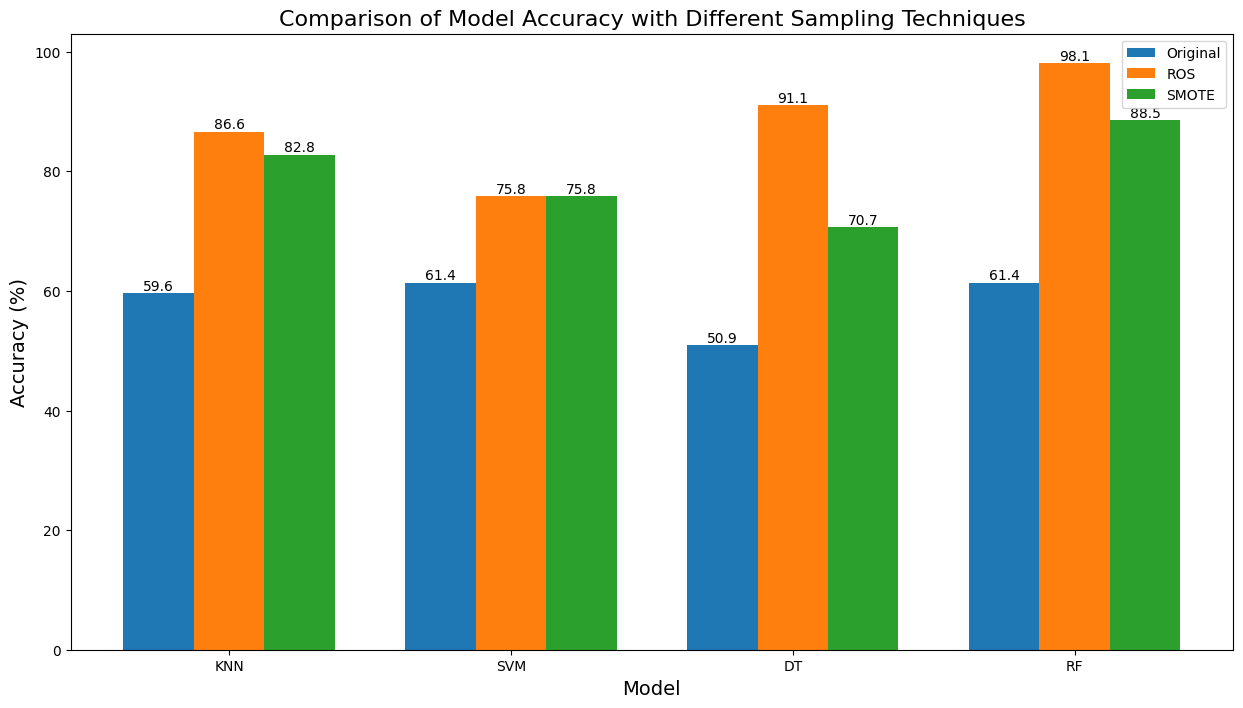

In [ ]:
bar_width = 0.25
index = range(len(models))

fig, ax = plt.subplots(figsize=(15, 8))

bar1 = ax.bar(index, accuracy_original, bar_width, label='Original')
bar2 = ax.bar([i + bar_width for i in index], accuracy_ros, bar_width, label='ROS')
bar3 = ax.bar([i + 2 * bar_width for i in index], accuracy_smote, bar_width, label='SMOTE')

ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy (%)', fontsize=14)
ax.set_title('Comparison of Model Accuracy with Different Sampling Techniques', fontsize=16)
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(models)
ax.legend()

def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

plt.show()

# 9. Kesimpulan

Dari hasil eksperimen yang dilakukan pada dataset HeartDisease dengan tiga kondisi (original, random over sampling/ROS, dan SMOTE) menggunakan beberapa algoritma machine learning, dapat diambil beberapa kesimpulan:

1. **Original Data:**
  - Secara umum, akurasi berada di rentang 50% - 60% hal ini dikarenakan persebaran kelas yang tidak stabil.
  - Model SVM dan RF mendapatkan akurasi tertinggi dari ke 4 model yaitu 61.4%

2. **Random Over Sampling (ROS):**
   - Terjadi peningkatan akurasi untuk semua model. Peningkatan ini mungkin disebabkan oleh penanganan ketidakseimbangan kelas dengan menambahkan sampel dari kelas minoritas.
   - RF mencapai akurasi tertinggi dari ke 4 model yaitu 98.1%.

3. **SMOTE:**
   - Peningkatan akurasi terlihat pada beberapa model, tetapi tidak sebesar ROS.
   - Pada model SVM akurasi pada dataset setelah SMOTE sama dengan akurasi dataset setelah ROS .

4. **General Observations:**
   - Seluruh model memiliki akurasi yang lebih baik pada dataset yang telah mengalami ROS dan SMOTE. Hal ini dikarenakan persebaran kelas menjadi sama (balance) sehingga informasi untuk setiap kelas menjadi banyak.
   - Model Random Forest memiliki akurasi yang unggul dari keseluruhan model untuk seluruh kondisi dataset.